In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [6]:
# Set paths
trainval_dir = r"F:\Projects\Otoscope_AIModel\Datos\Training-validation"
test_dir = r"F:\Projects\Otoscope_AIModel\Datos\Testing"

In [7]:
img_size = (224, 224)
batch_size = 32

# Split train and validation from Training-Validation
trainval_datagen = ImageDataGenerator(rescale=1./255, 
                                      validation_split=0.2, 
                                      rotation_range=20,
                                      zoom_range=0.15,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.15,
                                      horizontal_flip=True)

In [8]:
train_data = trainval_datagen.flow_from_directory(
    trainval_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_data = trainval_datagen.flow_from_directory(
    trainval_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 576 images belonging to 4 classes.
Found 144 images belonging to 4 classes.


In [23]:
# Correct variable name
print("Class indices:", train_data.class_indices)

# Optional: Convert to index-to-name mapping
class_names = list(train_data.class_indices.keys())
print("Class names:", class_names)

Class indices: {'Chronic otitis media': 0, 'Earwax plug': 1, 'Myringosclerosis': 2, 'Normal': 3}
Class names: ['Chronic otitis media', 'Earwax plug', 'Myringosclerosis', 'Normal']


In [9]:
# Test data (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 160 images belonging to 4 classes.


In [10]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base layers

# Add custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(train_data.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)

# Compile
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 14s 2us/step


In [12]:
history = model.fit(train_data, epochs=10, validation_data=val_data)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 959ms/step - accuracy: 0.3040 - loss: 1.6077

F:\Projects\DataStructure-Queue\pythonProject\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.3070 - loss: 1.5981 - val_accuracy: 0.5000 - val_loss: 1.0830
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 861ms/step - accuracy: 0.5384 - loss: 1.0278 - val_accuracy: 0.6319 - val_loss: 0.8329
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 860ms/step - accuracy: 0.6597 - loss: 0.7989 - val_accuracy: 0.6250 - val_loss: 0.7130
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 844ms/step - accuracy: 0.7600 - loss: 0.6498 - val_accuracy: 0.6875 - val_loss: 0.6489
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 846ms/step - accuracy: 0.7801 - loss: 0.5761 - val_accuracy: 0.7569 - val_loss: 0.5633
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 834ms/step - accuracy: 0.8027 - loss: 0.5247 - val_accuracy: 0.7361 - val_loss: 0.5315
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 853ms/step - accuracy: 0.8400 - loss: 0.4490 - val_accuracy: 0.7778 - val_loss: 0.5190
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 846ms/step - accuracy: 0.8543 - loss: 0.4258 - val_accuracy: 0.7222 -

In [13]:
loss, acc = model.evaluate(test_data)
print(f"Test Accuracy: {acc:.2f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 696ms/step - accuracy: 0.9224 - loss: 0.2509
Test Accuracy: 0.87


In [16]:
model.save("my_model.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


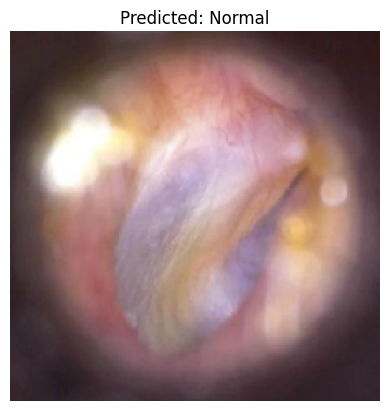

Predicted class: Normal
Prediction probabilities: [1.21387109e-01 4.35524969e-04 1.07219286e-01 7.70958066e-01]


In [25]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Set your image path here
img_path = r"F:\Projects\Otoscope_AIModel\Datos\Training-validation\Normal\n16.jpg"

# Load and preprocess the image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Load the model
model = tf.keras.models.load_model("my_model.keras")  # or .h5

# Class names in the same order as your training set
class_names = ['Chronic otitis media', 'Earwax plug', 'Myringosclerosis', 'Normal']

# Predict
predictions = model.predict(img_array)
predicted_index = np.argmax(predictions, axis=1)[0]
predicted_class = class_names[predicted_index]

# Display result
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted: {predicted_class}")
plt.show()

# Print class and probabilities
print(f"Predicted class: {predicted_class}")
print("Prediction probabilities:", predictions[0])